# Learning On MNIST
In this notebook you will be given an introduction to MNIST Database.
https://en.wikipedia.org/wiki/MNIST_database

We start with loading the data.
Download the training and testing database from: http://yann.lecun.com/exdb/mnist/
Extract and make csv files using the following script:

In [ ]:
import gzip

def convertMnistToCsv(x,y,out_name,size):
    #Creating new file
    new_file = open(out_name, "w") 
    x.read(16)
    y.read(8)
    images = []

    #Adding the first line in the csv file (the columns)
    columns = "Label"       
    for i in range(28*28):
        columns += ",P"+str(i)
    new_file.write(columns+"\n")

    #Making the data matrix
    for i in range(size):       
        image = [ord(y.read(1))]
        for j in range(28*28):
            image.append(ord(x.read(1)))
        images.append(image)

    #Combining each row and writing to the new file in csv format
    for image in images:
        new_file.write(",".join(str(pix) for pix in image)+"\n")

    x.close()
    y.close()
    new_file.close()

Xtrain = gzip.open("train-images-idx3-ubyte.gz",'r')
Ytrain = gzip.open("train-labels-idx1-ubyte.gz",'r')
Xtest = gzip.open("t10k-images-idx3-ubyte.gz",'r')
Ytest = gzip.open("t10k-labels-idx1-ubyte.gz",'r')
convertMnistToCsv(Xtrain, Ytrain, "mnist_train.csv", 60000)
convertMnistToCsv(Xtest, Ytest,"mnist_test.csv", 10000)

Looking at the output files (A notepad for large data or Pandas library),"mnist_train.csv" and "mnist_test.csv", and observing the first row (Columns row) shows the format of the files: Label,P0,P1,...P783.
The first column is the label of the image, and "P'i'" is the pixel located in 0<=i<=783, where 0<=P'i'<=255

Split the data into two datasets(Xtrain,Xtest) and two label sets(Ytrain,Ytest) corresponding:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("mnist/mnist_train.csv")
test_data = pd.read_csv("mnist/mnist_test.csv")

Xtrain = train_data.iloc[:,1:]
Ytrain = train_data.iloc[:,:1]
Ytrain = Ytrain.values.ravel()

Xtest = test_data.iloc[:,1:]
Ytest = test_data.iloc[:,:1]
Ytest = Ytest.values.ravel()

Make two additional datasets to test the difference when modifying the data:
    Categorical - combining interval of number to specific label.
    Normalized - all the values become between 0 to 1, and unnecessary columns deleted.

New dataset by category:

In [128]:
catXtrain = pd.DataFrame()
catXtest = pd.DataFrame()
for col in Xtrain.columns:
    catXtrain[col+'_cat'] = pd.cut(Xtrain[col],bins=[-np.inf, 50, np.inf],labels=[0,1])
    catXtest[col+'_cat'] = pd.cut(Xtest[col],bins=[-np.inf, 50, np.inf],labels=[0,1])
    
catXtrain = catXtrain.astype(np.int64)
catXtest = catXtest.astype(np.int64)

New dataset with normalization:

In [131]:
normXtrain = Xtrain / 255
normXtest = Xtest / 255
for column in normXtrain:
    if normXtrain[column].mean() == 0. and normXtest[column].mean() == 0.:
        normXtrain = normXtrain.drop([column],axis=1)
        normXtest = normXtest.drop([column],axis=1)

Make correlation matrix for the category dataset.
As you can expect, there is a high correlation between a pixel and its sourounding pixels:

In [132]:
corr_matrix = catXtrain.corr()
corr_matrix["P300_cat"].sort_values(ascending=False)

P300_cat    1.000000
P272_cat    0.776096
P328_cat    0.773510
P301_cat    0.661627
P299_cat    0.636626
              ...   
P759_cat         NaN
P780_cat         NaN
P781_cat         NaN
P782_cat         NaN
P783_cat         NaN
Name: P300_cat, Length: 784, dtype: float64

Describe statistical stats about the normalized dataset.
As you can expect, max is always greather than 1 and the mean is always greather then 0.
Also we can assume that 65 = 784 - 719 were dropped.

In [133]:
normXtrain.describe()

,P12,P13,P14,P15,P32,P33,P34,P35,P36,P37,...,P770,P771,P772,P773,P774,P775,P776,P777,P778,P779
count,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000008,0.000031,0.000014,5.882353e-07,0.000001,0.000004,0.000036,0.000095,0.000171,0.000251,...,0.002698,0.002322,0.001893,0.001347,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008
std,0.001864,0.005338,0.003458,1.440876e-04,0.000256,0.000763,0.004137,0.008216,0.011616,0.013035,...,0.044718,0.041244,0.036854,0.031599,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.454902,0.996078,0.847059,3.529412e-02,0.062745,0.184314,0.615686,0.996078,1.000000,0.996078,...,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137


Build three SVM models for each dataset (Xtrain, catXtrain, normXtrain).
Evaluate the models using cross validation for under/overfitting

In [140]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#Original dataset
svm_model1 = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo').fit(Xtrain.iloc[:1000],Ytrain[:1000])
scores1 = cross_val_score(svm_model1,Xtrain.iloc[:1000],Ytrain[:1000],cv=5)

#Categorical dataset
svm_model2 = svm.SVC(kernel='linear',C=1,decision_function_shape='ovo').fit(catXtrain.iloc[:1000],Ytrain[:1000])
scores2 = cross_val_score(svm_model2,catXtrain.iloc[:1000],Ytrain[:1000],cv=5)

#Normalized dataset
svm_model3 = svm.SVC(kernel='rbf',C=1,decision_function_shape='ovo').fit(normXtrain.iloc[:1000],Ytrain[:1000])
scores3 = cross_val_score(svm_model3,normXtrain.iloc[:1000],Ytrain[:1000],cv=5)

print("Original Xtrain:")
print("Cross validation Score:",scores1.mean(),"+/-",scores1.std() * 2)
print("Test sample Score:",svm_model1.score(Xtest.iloc[:2000],Ytest[:2000]),"\n")

print("Category Xtrain:")
print("Cross validation Score:",scores2.mean(),"+/-",scores2.std() * 2)
print("Test sample Scoree:",svm_model2.score(catXtest.iloc[:2000],Ytest[:2000]),"\n")

print("Normalized Xtrain:")
print("Cross validation Score:",scores3.mean(),"+/-",scores3.std() * 2)
print("Test sample Score",svm_model3.score(normXtest.iloc[:2000],Ytest[:2000]),"\n")

Original Xtrain:
Cross validation Score: 0.876 +/- 0.029257477676655614
Test sample Score: 0.8425 

Category Xtrain:
Cross validation Score: 0.876 +/- 0.00979795897113272
Test sample Scoree: 0.841 

Normalized Xtrain:
Cross validation Score: 0.901 +/- 0.02315167380558047
Test sample Score 0.87 



Explore different metrics to evaluate the model.

Use confusion matrix to find labels with high number of false-positive or false-negative.

array([[165,   0,   0,   0,   3,   3,   4,   0,   0,   0],
       [  0, 229,   0,   0,   0,   1,   0,   2,   2,   0],
       [  3,   2, 194,   1,   3,   0,   7,   6,   3,   0],
       [  0,   3,   4, 154,   0,  31,   2,   4,   8,   1],
       [  0,   1,   0,   1, 183,   2,   5,   0,   0,  25],
       [  2,   1,   2,   7,   2, 147,   2,   4,   4,   8],
       [  2,   1,   7,   0,   4,   7, 156,   1,   0,   0],
       [  0,   5,  11,   3,   7,   1,   0, 165,   0,  13],
       [  4,   3,   7,   9,   2,  16,   4,   4, 133,  10],
       [  1,   0,   0,   6,  10,   4,   0,  12,   2, 159]], dtype=int64)

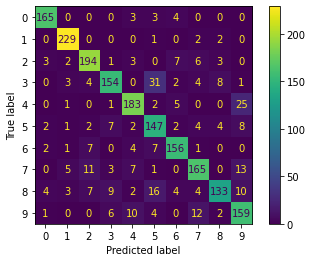

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

labels = [0,1,2,3,4,5,6,7,8,9]

plot_confusion_matrix(svm_model1,Xtest.iloc[:2000],Ytest[:2000],labels=labels)
confusion_matrix(Ytest[:2000],svm_model1.predict(Xtest.iloc[:2000]),labels=labels)

Use Precision and Recall to improve f1 score.

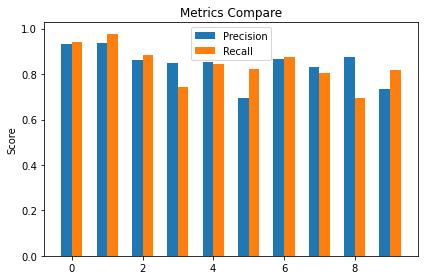

In [121]:
from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt

labels = [0,1,2,3,4,5,6,7,8,9]
pre_score = precision_score(Ytest[:2000], y_test_pred,average=None)
rc_score = recall_score(Ytest[:2000], y_test_pred,average=None)
comb_score = f1_score(Ytest[:2000],y_test_pred,average=None)

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_score, width, label='Precision')
rects2 = ax.bar(x + width/2, rc_score, width, label='Recall')
ax.set_ylabel('Score')
ax.set_title('Metrics Compare')
ax.legend()


fig.tight_layout()

plt.show()